In [317]:
from pylab import *

# Problem 1
## Part A
### Single Geometric Brownian Motion

In [364]:
seed(1)
mu = 0.3
sigma = 0.5
S_0 = 1

k = 15
N = 2**k
T = 1

dt = T/N
time  = linspace(0,T,N)

dW = normal(0,1,N)*sqrt(dt)
S = S_0*cumprod(exp((mu - 0.5*sigma**2)*dt + sigma*dW))

### Estimating $\hat{\sigma}, \hat{\mu}$ on coarsened data sets

In [ ]:
def estimated_dev(i):
    sample = S[::2**i]
    r = diff(log(sample))
    new_dt = T/len(r)
    return std(r)/sqrt(new_dt)
estimated_dev = vectorize(estimated_dev)

def estimated_mean(i):
    sample = S[::2**i]
    r = diff(log(sample))
    new_dt = T/len(r)
    return mean(r)/new_dt + 0.5*(estimated_dev(i)**2)
estimated_mean = vectorize(estimated_mean)

### Plotting $\hat{\sigma}, \hat{\mu}$

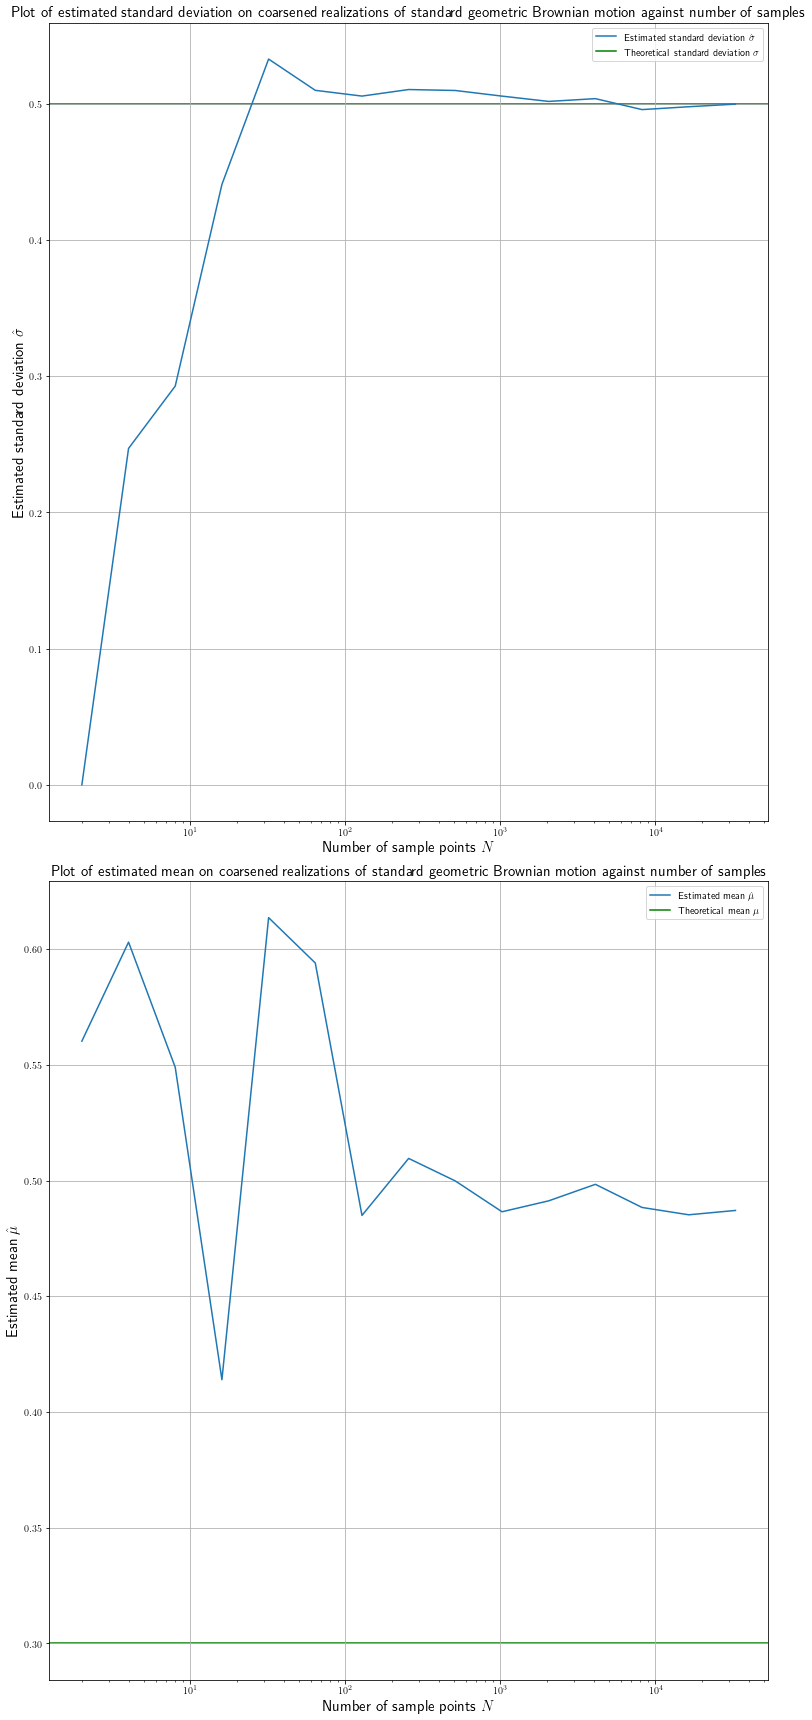

In [365]:
ii = arange(k)
xx = 2**(k-ii)

fig = plt.figure(figsize=(12,24))
rc('text', usetex=True)

ax1 = fig.add_subplot(211)
ax1.semilogx(xx, estimated_dev(ii), label=r'Estimated standard deviation $\hat{\sigma}$')
ax1.set_xlabel(r'Number of sample points $N$', fontsize=15)
ax1.set_ylabel(r'Estimated standard deviation $\hat{\sigma}$', fontsize=15)
ax1.axhline(0.5, color='green', zorder=1, label = r'Theoretical standard deviation $\sigma$')
ax1.set_title('Plot of estimated standard deviation on coarsened realizations of standard geometric Brownian motion against number of samples', fontsize=15)
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.semilogx(xx, estimated_mean(ii), label=r'Estimated mean $\hat{\mu}$')
ax2.set_xlabel(r'Number of sample points $N$', fontsize=15)
ax2.set_ylabel(r'Estimated mean $\hat{\mu}$', fontsize=15)
ax2.axhline(0.3, color='green', zorder=1, label=r'Theoretical mean $\mu$')
ax2.set_title(r'Plot of estimated mean on coarsened realizations of standard geometric Brownian motion against number of samples', fontsize=15)
ax2.grid()
ax2.legend()
plt.tight_layout()

The estimated standard deviation does seem to converge to the theoretical value, while the estimated mean does not approach the theoretical value, and in fact does not converge to a stable position, as changing the seed drastically changes this estimate.
## Part B: Geometric Brownian Motion Ensemble

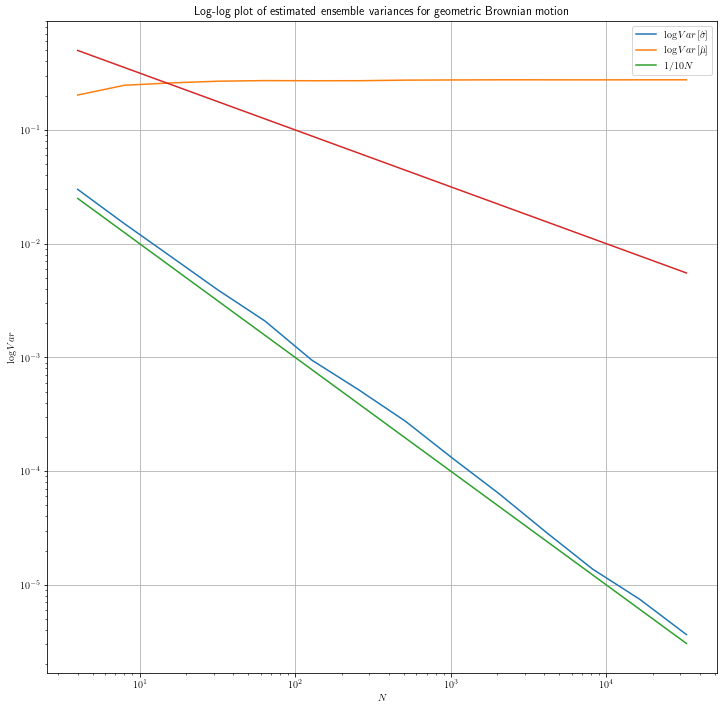

In [383]:
M = 400
dW = normal(0,1,size=(M,N-1))*sqrt(dt)
W = cumsum(dW, axis=1)
W = c_[zeros(M),W]

S_ensemble = exp((mu - 0.5*sigma**2)*tile(time, (M,1)) + sigma*W) 

def est_dev_ensemble(i):
    sample_cols = S_ensemble[:, ::2**i]
    r = diff(log(sample_cols), axis=1)
    
    num_cols = r.shape[1]
    new_dt = T/num_cols
    
    est_devs = std(r, axis=1)/sqrt(new_dt)
    
    return mean(est_devs), var(est_devs)
est_dev_ensemble = vectorize(est_dev_ensemble)

def est_mean_ensemble(i):
    sample_cols = S_ensemble[:, ::2**i]
    r = diff(log(sample_cols), axis=1)
    
    num_cols = r.shape[1]
    new_dt = T/num_cols
    
    est_means = (mean(r, axis=1) + 0.5*var(r, axis=1))/new_dt
    return mean(est_means), var(est_means)
est_mean_ensemble = vectorize(est_mean_ensemble)

bb = arange(k-1)
yy = 2**(k-bb)

figure(figsize=(12,12))
rc('text', usetex=True)

loglog(yy, est_dev_ensemble(bb)[1], label='$\log Var[\hat{\sigma}]$')
loglog(yy, est_mean_ensemble(bb)[1],label='$\log Var[\hat{\mu}]$')
loglog(yy, .1/yy, label='$1/10N$')
xlabel('$N$')
ylabel('$\log Var$')
title('Log-log plot of estimated ensemble variances for geometric Brownian motion')
grid()
legend()

show()

From this graph we see that $Var[\hat{\sigma}] \sim O(1/N),$ and so decreases with increasing sample size. $Var[\hat{\mu}],$ on the other hand, does not decrease with increasing sample size, and the graph above suggests it grows roughly as a power of $N.$

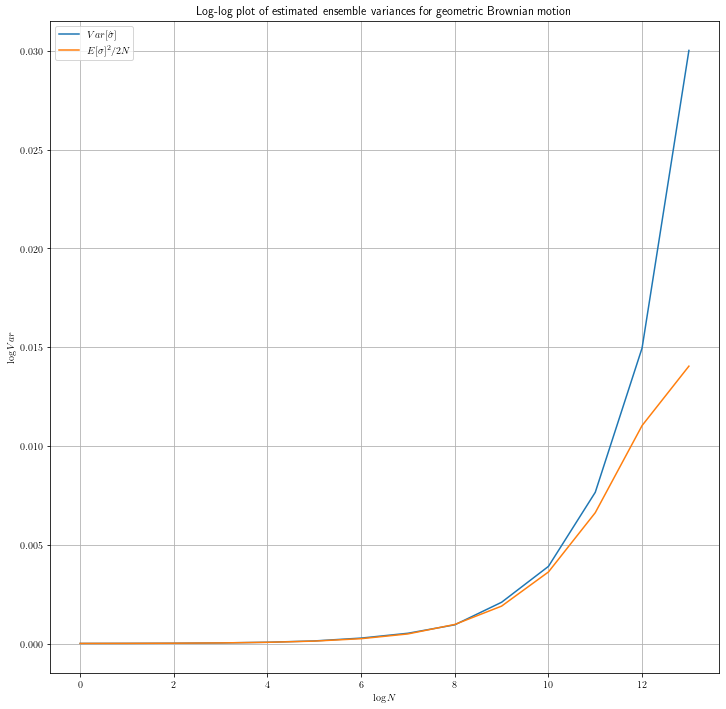

In [384]:
figure(figsize=(12,12))
rc('text', usetex=True)
plot(bb, est_dev_ensemble(bb)[1], label='$Var[\hat{\sigma}]$')
plot(bb, 0.5*(est_dev_ensemble(bb)[0]**2)/yy, label='$E[\sigma]^2/2N$')
xlabel('$\log N$')
ylabel('$\log Var$')
title('Log-log plot of estimated ensemble variances for geometric Brownian motion')
grid()
legend()
show()

We do seem to have initial agreement with the theoretical value.
### Part C

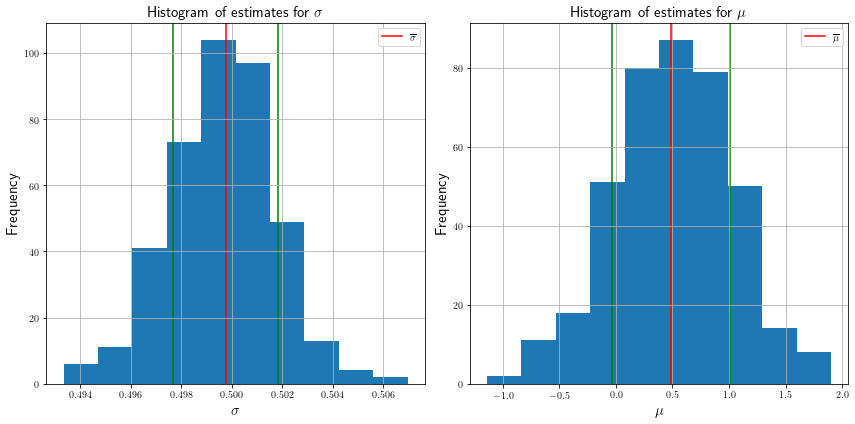

In [354]:
R = diff(log(S))
sigma_bar = std(R)/sqrt(T/len(R))
mu_bar = mean(R)/(T/len(R)) + 0.5*sigma_bar**2
new_ensemble = exp((mu_bar - 0.5*sigma_bar**2)*tile(time, (M,1)) + sigma_bar*W) 

R_ensemble = diff(log(new_ensemble), axis=1)
ensemble_devs = std(R_ensemble, axis=1)/sqrt(T/R_ensemble.shape[1])
ensemble_means = (mean(R_ensemble, axis=1) + 0.5*var(R_ensemble, axis=1))/(T/R_ensemble.shape[1])

fig = plt.figure(figsize=(12,6))
rc('text', usetex=True)

ax1 = fig.add_subplot(121)
ax1.hist(ensemble_devs, histtype='stepfilled')
ax1.axvline(sigma_bar,color='red', zorder=1, label='$\overline{\sigma}$')
ax1.axvline(sigma_bar + std(ensemble_devs), color='green', zorder=1)
ax1.axvline(sigma_bar - std(ensemble_devs), color='green', zorder=1)

ax1.set_xlabel(r'$\sigma$', fontsize=15)
ax1.set_ylabel(r'Frequency', fontsize=15)
ax1.set_title('Histogram of estimates for $\sigma$', fontsize=15)
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.hist(ensemble_means, histtype='stepfilled')
ax2.axvline(mu_bar,color='red', zorder=1, label='$\overline{\mu}$')
ax2.axvline(mu_bar + std(ensemble_means), color='green', zorder=1)
ax2.axvline(mu_bar - std(ensemble_means), color='green', zorder=1)

ax2.set_xlabel(r'$\mu$', fontsize=15)
ax2.set_ylabel(r'Frequency', fontsize=15)
ax2.set_title('Histogram of estimates for $\mu$', fontsize=15)
ax2.grid()
ax2.legend()

plt.tight_layout()

We note that the variance of the estimates for $\mu$ is relatively large, while that of $\sigma$ is smaller.
### Part D: Noise

In [386]:
freq = 1e10
c =  50
#noise_var = 0.1*std(S)
S_normal = S + normal(0,0.1,N)*sqrt(dt) # 10% noise
S_periodic = S + mean(S)*sin(2*pi*freq*arange(N))*sqrt(dt)

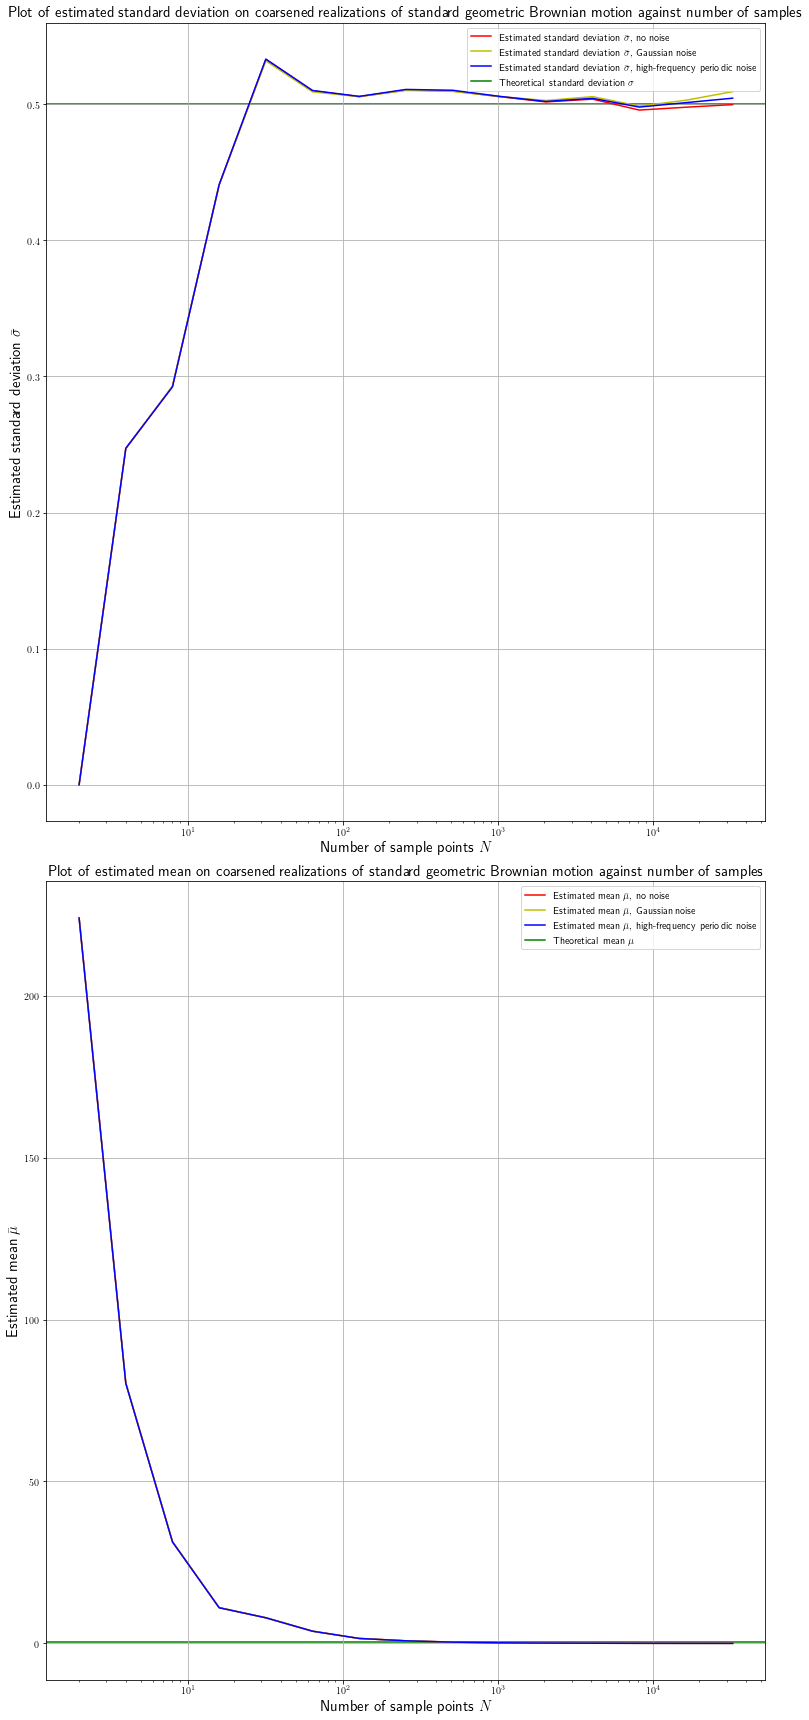

In [387]:
def new_estimated_dev(i):
    sample_original = S[::2**i]
    sample_normal = S_normal[::2**i]
    sample_periodic = S_periodic[::2**i]
    
    r_original = diff(log(sample_original))
    r_normal = diff(log(sample_normal))
    r_periodic = diff(log(sample_periodic))
    
    new_dt = T/len(r_original)
    
    stdev = std(r_original)/sqrt(new_dt)
    stdev_normal = std(r_normal)/sqrt(new_dt)
    stdev_periodic = std(r_periodic)/sqrt(new_dt)
    
    return stdev, stdev_normal, stdev_periodic
new_estimated_dev = vectorize(new_estimated_dev)

def new_estimated_mean(i):
    sample_original = S[::2**i]
    sample_normal = S_normal[::2**i]
    sample_periodic = S_periodic[::2**i]
    
    r_original = diff(log(sample_original))
    r_normal = diff(log(sample_normal))
    r_periodic = diff(log(sample_periodic))
    
    new_dt = T/len(r)
    
    mean_original = (mean(r_original) + 0.5*var(r_original))/new_dt
    mean_normal = (mean(r_normal) + 0.5*var(r_normal))/new_dt
    mean_periodic = (mean(r_periodic) + 0.5*var(r_periodic))/new_dt
    
    return mean_original, mean_normal, mean_periodic
new_estimated_mean = vectorize(new_estimated_mean)

ii = arange(k)
xx = 2**(k-ii)

fig = plt.figure(figsize=(12,24))
rc('text', usetex=True)

ax1 = fig.add_subplot(211)
ax1.semilogx(xx, new_estimated_dev(ii)[0], color='r', label=r'Estimated standard deviation $\bar{\sigma},$ no noise')
ax1.semilogx(xx, new_estimated_dev(ii)[1], color='y', label=r'Estimated standard deviation $\bar{\sigma},$ Gaussian noise')
ax1.semilogx(xx, new_estimated_dev(ii)[2], color='b', label=r'Estimated standard deviation $\bar{\sigma},$ high-frequency periodic noise')
ax1.set_xlabel(r'Number of sample points $N$', fontsize=15)
ax1.set_ylabel(r'Estimated standard deviation $\bar{\sigma}$', fontsize=15)
ax1.axhline(0.5, color='green', zorder=1, label = r'Theoretical standard deviation $\sigma$')
ax1.set_title('Plot of estimated standard deviation on coarsened realizations of standard geometric Brownian motion against number of samples', fontsize=15)
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.semilogx(xx, new_estimated_mean(ii)[0], color='r', label=r'Estimated mean $\bar{\mu},$ no noise')
ax2.semilogx(xx, new_estimated_mean(ii)[1], color='y', label=r'Estimated mean $\bar{\mu},$ Gaussian noise')
ax2.semilogx(xx, new_estimated_mean(ii)[2], color='b', label=r'Estimated mean $\bar{\mu},$ high-frequency periodic noise')
ax2.set_xlabel(r'Number of sample points $N$', fontsize=15)
ax2.set_ylabel(r'Estimated mean $\bar{\mu}$', fontsize=15)
ax2.axhline(0.3, color='green', zorder=1, label=r'Theoretical mean $\mu$')
ax2.set_title(r'Plot of estimated mean on coarsened realizations of standard geometric Brownian motion against number of samples', fontsize=15)
ax2.grid()
ax2.legend()
plt.tight_layout()

The estimated standard deviation for the sample with Gaussian noise does not seem to converge to the theoretical value, while that with high-frequency noise does. 

Neither of the estimated means converges to the theoretical mean.
### Part E: Normal distribution of log-returns

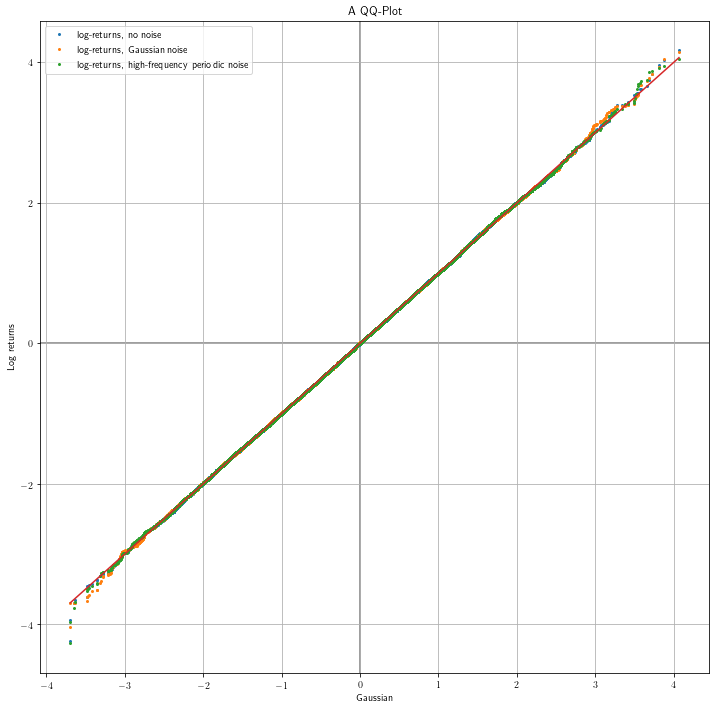

In [388]:
logreturns = diff(log(S))
logreturns_normal = diff(log(S_normal))
logreturns_periodic=  diff(log(S_periodic))

X = (logreturns - mean(logreturns))/std(logreturns)
X_normal = (logreturns_normal - mean(logreturns_normal))/std(logreturns_normal)
X_periodic = (logreturns_periodic - mean(logreturns_periodic))/std(logreturns_periodic)
gauss = normal(size=len(logreturns))

figure(figsize=(12,12))
title('A QQ-Plot')
plot(sort(gauss),sort(X),'o',markersize=2, label='log-returns, no noise')
plot(sort(gauss),sort(X_normal),'o',markersize=2, label='log-returns, Gaussian noise')
plot(sort(gauss),sort(X_periodic),'o',markersize=2, label='log-returns, high-frequency periodic noise')
plot(sort(gauss),sort(gauss))
xlabel('Gaussian')
ylabel('Log returns')
grid()
axhline(color='gray', zorder=-1)
axvline(color='gray', zorder=-1)
legend()
show()

The sample points mostly lie close to the line $y = x$.  From this we can conclude that the log-returns are distributed approximately normally.The plot points only diverge significantly from the Gaussian distribution after the third quantiles, indicating divergence from the normal in rare events.

### Part F: Independence of log-returns
We use `matplotlib`'s `acorr` to plot all three autocorellation functions:

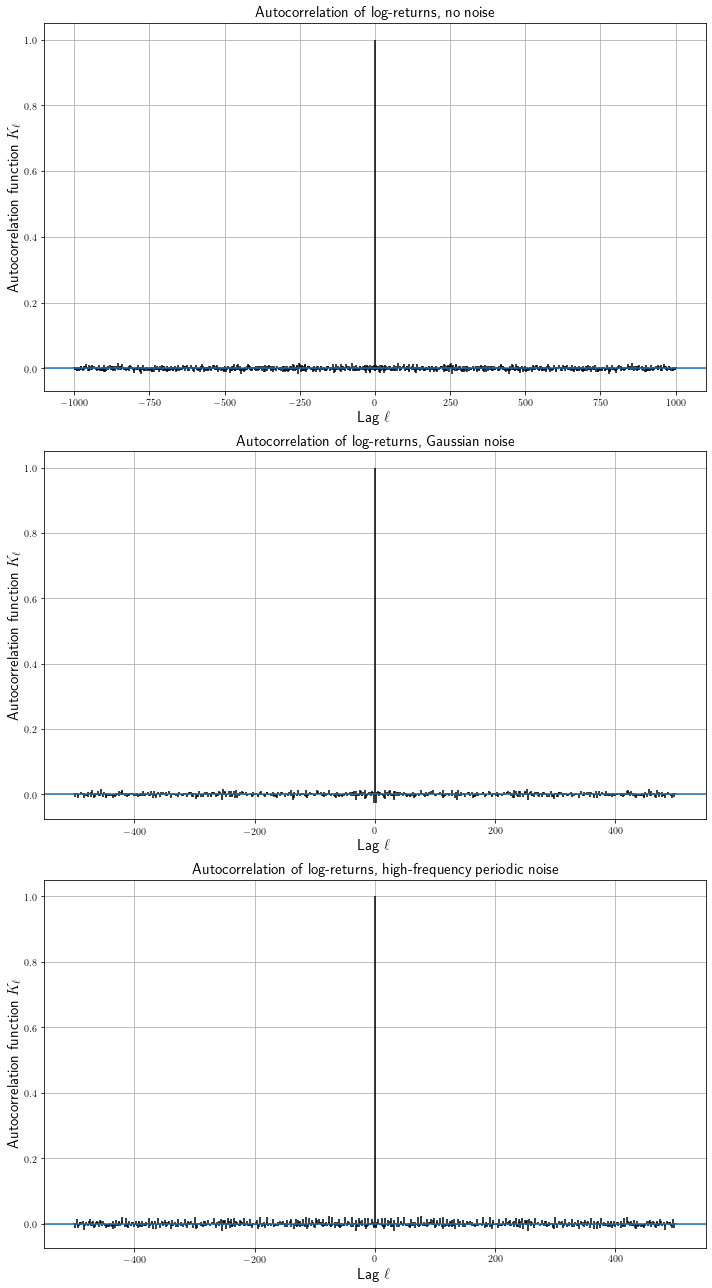

In [389]:
fig = plt.figure(figsize=(10,18))
rc('text', usetex=True)

ax1 = fig.add_subplot(311)
ax1.acorr(logreturns, maxlags=1000)
#ax1.set_xlim([-0.5,1000])

ax1.set_xlabel(r'Lag $\ell$', fontsize=15)
ax1.set_ylabel(r'Autocorrelation function $K_{\ell}$', fontsize=15)
ax1.set_title('Autocorrelation of log-returns, no noise', fontsize=15)
ax1.grid()

ax2 = fig.add_subplot(312)
ax2.acorr(logreturns_normal, maxlags=500)
#ax2.set_xlim([-0.5,1000])

ax2.set_xlabel(r'Lag $\ell$', fontsize=15)
ax2.set_ylabel(r'Autocorrelation function $K_{\ell}$', fontsize=15)
ax2.set_title('Autocorrelation of log-returns, Gaussian noise', fontsize=15)
ax2.grid()

ax3 = fig.add_subplot(313)
ax3.acorr(logreturns_periodic, maxlags=500)
#ax3.set_xlim([-0.5,1000])

ax3.set_xlabel(r'Lag $\ell$', fontsize=15)
ax3.set_ylabel(r'Autocorrelation function $K_{\ell}$', fontsize=15)
ax3.set_title('Autocorrelation of log-returns, high-frequency periodic noise', fontsize=15)
ax3.grid()

plt.tight_layout()

From these graphs we conclude that the log-returns are largely independently distributed as well, even with noise.